# Quantum Fourier Transform

In this tutorial I want to discuss the quantum fourier transform. 

## Why should we care?

1. Quantum fourier transform is an ingredient of many useful and exciting quantum algorithms including the shor's algorithm. So, we kinda have to care about it.
2. Although it doesn't give us the full fourier transform, it does get us a long way. We care about fourier transform because it is useful in things like speech recognition. I realize that saying it's useful in speech recognition is kinda lazy because I haven't told you how exactly it's used in speech recognition. But going into how it's useful in speech recognition is beyond this article. For that, I add this into further questions. 

## What is the problem? 

Qft tackles the following problem: 

*Given vector $[x_0 x_1 \dots x_{N-1}] \in \mathbb{C}^n$ transform it to $[y_0 y_1 \dots y_{N-1}]$ where $$y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_j e^{\frac{2\pi ijk}{N}}$$*

or equivalently

*$$\sum_{j=0}^{N-1} x_j |j\rangle = \sum_{k=0}^{N-1} y_k |k\rangle$$* where $$|j \rangle \to \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi ijk/N} |k\rangle$$

## Solution

We will design a quantum circuit that gives us qubits whose states encode the fourier transform. But unfortunately, we won't be able to extract this information out of the qubits. 

Let's start with this rather disappointing endevour. 

### Preprocessing

We saw that the problem description allows for arbitrary complex numbers, but we are only able to enter bits/qubits. So we need to transform the problem into a more bit friendly environmnet. 

For this we write:
1. $N = 2^n$
2. We express every basis state $|j\rangle \in \{|0\rangle, \dots |N-1\rangle\}$ as $|j\rangle = |j_1 \dots j_n\rangle$  where $j_i \in \{0,1\}$. So, $j = j_1 2^{n-1} + \dots j_n 2^{0}$
3. We use $0.j_lj_{l+1}\dots j_{m}$ to represent $j_l/2 + j_{l+1}/4 + \dots j_m/2^{m-l+1}$

### Discovering the algorithm

Note first that if we are able to do $|j \rangle \to \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi ijk/N} |k\rangle$, then we are done because the general transform can be derived from linear combinations of this transform. 

Also, we can't just put in $|j\rangle$ into our circuit as it is, we need to encode into qubits first. This is done by simply doing $|j\rangle = |j_1 \dots j_n\rangle$

Now, in order to figure out my circuit, I should figure out what I want to do with each of the $n$ qubits. For this, I must break the output into output qubits. How do we do this? 

1. A natural first step is to *split $|k \rangle$ as $|k_1 \dots k_n\rangle$*. So, we have: $$\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi ijk/N} |k\rangle = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi ijk/N} |k_1\dots k_n\rangle$$.

2. Now, a natural second step is to *split the $k$ in the exponent also*. We can do this by writing $k/N = (\sum_{l=1}^n k_l 2^{n-l}))/N = \sum_{l=1}^n k_l 2^{-l}$  So we have:
$$\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi ijk/N} |k_1\dots k_n\rangle = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi ij\sum_{l=1}^n k_l 2^{-l}} |k_1\dots k_n\rangle = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} \bigotimes_{l=1}^n e^{2\pi ij k_l 2^{-l}} |k_l\rangle$$

3. Now, notice that *we have made a bit of a poo poo*, there is no $k$ in the expression anymore, so we should replace the $k$ in the sum with $k_1 \dots k_n$. So we have: 
$$ \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} \bigotimes_{l=1}^n e^{2\pi ij k_l 2^{-l}} |k_l\rangle = \frac{1}{\sqrt{N}} \bigotimes_{l=1}^n \sum_{k_l = 0}^1 e^{2\pi ij k_l 2^{-l}} |k_l\rangle$$

4. We are almost done. We have split our output into the output qubits. But, as of now, each output qubit is using all the n input qubits $j_1 \dots j_n$. Can we make this simpler? Indeed we can - we write $j 2^{-l} = \sum_{t=1}^{n} j_t 2^{t-1-l}$ and use the third preprocessing step to write: 
$$\frac{1}{\sqrt{N}} \bigotimes_{l=1}^n \sum_{k_l = 0}^1 e^{2\pi ij k_l 2^{-l}} |k_l\rangle = \frac{(|0\rangle + e^{2\pi i 0.j_n} |1\rangle)(|0\rangle + e^{2\pi i 0.j_{n-1}j_n} |1\rangle)\dots (|0\rangle + e^{2\pi i 0.j_1j_2\dots j_n} |1\rangle)}{2^{n/2}}$$


## Constucting the circuit

Sheesh, that was actually taxing. But I'm happy to say that we are almost done. Now, we just need to figure out the gates that would do these operations for us. Let's focus on one qubit at a time. 

1. The first output qubit is supposed to be $|0\rangle + |1\rangle$ if $j_n = 0$ and $|0\rangle - |1\rangle$ if $j_n = 1$. We can get this exactly by applying the *Hadamard* gate to $j_n$. 

2. Now the second output qubit = $|0\rangle + e^{2\pi i (\frac{j_{n-1}}{2} + \frac{j_n}{2^2})} |1 = |0\rangle + e^{2\pi i \frac{j_{n-1}}{2}}.e^{2\pi i \frac{j_n}{2^2}} |1\rangle$. Now, like in the case of 1st qubit, we can get the $e^{2\pi i \frac{j_{n-1}}{2}}$ part by just applying Hadamard to $j_{n-1}$. Now, if the $j_n = 0$, we don't need to do anything, and if we get $|1\rangle$ we have to apply $\frac{2 \pi i}{4}$ rotation. This suggests already that we might want to use a controlled rotation with $j_{n}$ as the control.     

Looking at these 1st and 2nd qubits we notice two things:
1. 1st output qubit depends on the last qubit. 2nd qubit depends on the last and second last qubits. In fact, this pattern continues. So, it seems that it would be convenient to design the circuit in the reverse order and then apply swap gates to fix the order. 
2. We seem to be needing a Hadamard gate followed by a controlled rotation - with the control of the rotation depending on the qubits coming after it. The rotation seems to depend on how far down the qubit is from the current one.

Extrapolating just these observations, we can build the following circuit (taken from Nielsen, Chuang): 

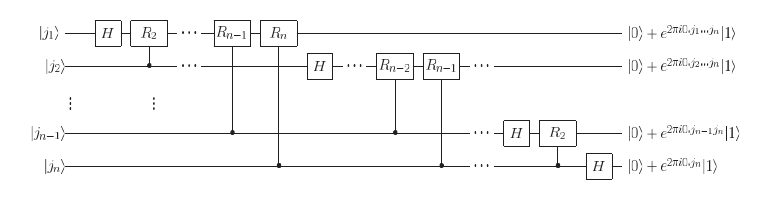

Here $R_k$ denotes the gate $\begin{bmatrix} 0 && 1\\ 1 && e^\frac{2\pi i}{2^k}\end{bmatrix}$ 

# Qiskit Implementation

Now that we have seen how Quantum Fourier Transform works. We'll use Qiskit to develop an actual circuit. For this part of the tutorial, almost all code has been taken from the Qiskit tutorial on Quantum Fourier Transform, but I try to explain the code in more detail.

The strategy is to create a function that implements the required gates for the last qubit, and then to recursively move up the circuit. At the end we apply the swap gates which switch the $k^{th}$ and $(n-k-1)^{th}$ qubits ($k\in \{0, 1, \dots,n-1\}$.   

In [3]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit

In [4]:
# Recursive Function implementing the required gates. n is the number of total qubits in the circuit.
def qft_rotations(circuit, n):
    if n == 0: # base case - nothing to do if the circuit has no qubits. 
        return circuit
    n = n-1 # have to do this because indices start at 0
    circuit.h(n) # apply the hadamard to last qubit
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n) # apply the required rotations
    qft_rotations(circuit, n) # now to do the above for circuit with 1 less qubit
    
# self explanatory 
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

# wrapper function
def qft(circuit,n):
    qft_rotations(circuit,n)
    swap_registers(circuit,n)
    return circuit
    
# Drawing the circuit for 4 qubits:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw()

┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │  »
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X──»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     »
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

## Further Questions
1. How is fourier transform used for speech recognition?
2. Why do we do normalization in fourier transforms? 
3. How to understand the fourier transform? 
4. How is controlled rotation implemented? 